# Maestría en Inteligencia Artificial Aplicada
### Ciencia y analítica de datos
#### Actividad Semanal 5 -- Repaso de Transformación y Reducción de Dimensiones
##### Tecnológico de Monterrey
<p> Prof. María De La Paz Rico </p>
<p> Tutor: Roberto Antonio Guevara González </p>
<p> Alumno: Fernando Maytorena Espinosa de los Monteros | A01110946 </p>
<p> Jueves 27 de octubre de 2022 </p>


# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,  0,  2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

#### 1.0 - Ejemplo de descomposición y reonstrucción de matrices

In [58]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B = np.dot(np.dot(W, D), np.linalg.inv(W)) 

print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [59]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(A)

[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]


#### 1.1 - Matriz 1 (A)

In [60]:
#Matriz 1

A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("----------------Matriz original (A)---------------------")
print(A)
print("--------------------------------------------------------")
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("----------------Matriz reconstruida (B)------------------")
B = np.rint( np.dot(W, D).dot(Winv)) 
print(B)
print("-----------------------Matriz W-------------------------")
print(W)
print("-----------------------Matriz D-------------------------")
print(D)
print("-------------------Matriz W inversa---------------------")
print(Winv)
print("--------------------------------------------------------")

----------------Matriz original (A)---------------------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
--------------------------------------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
----------------Matriz reconstruida (B)------------------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------Matriz W-------------------------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------Matriz D-------------------------
[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]


##### **Comentarios sobre decomposición y reconstrucción de matrices**

El proceso de descomposición de la matriz A en sus componentes W y D se denomina eigendescomposición de A. La matriz W se denomina matriz de eigenvectores de A y la matriz D se denomina matriz de eigenvalores de A; la matriz D es una matriz diagonal, lo que significa que todos los elementos fuera de la diagonal son cero, mientras que La matriz W es una matriz ortogonal, lo que significa que su inversa es igual a su transpuesta. Esto lo podemos comprobar al imprimir ambas matrices. También podemos observar que la matriz W contiene los eigenvectores de A como columnas y la matriz D contiene los eigenvalores de A en la diagonal.

Primero, se calcula la eigendescomposición de la matriz A. Luego, se reconstruye la matriz original A de la eigendescomposición. La función eig() devuelve los eigenvalores y eigenvectores de la matriz A. Los eigenvalores se devuelven como una matriz diagonal. Los eigenvectores se devuelven como una matriz de eigenvectores. La matriz reconstruida B debe ser igual a la matriz original A (lo comprobamos al imprimir ambas matrices), si no es así, entonces la eigendescomposición no se ha calculado correctamente.

#### 1.2 - Matriz 2 (A2)

In [61]:
#Matriz 2

A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.round( np.dot(W, D).dot(Winv) ,2 ) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


Ya solo repetimos el proceso con las siguientes dos matrices (A2 y A3) para comprobar que la descomposición y construcción funciona correctamente en los tres ejemplos.

#### 1.3 - Matriz 3 (3A)

In [62]:
#Matriz 3

A = array([[5,4,0], [1,0,1], [10,7,1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.rint( W @ D @ Winv ) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition (SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

#### 2.0 - Ejemplo de compresión de imágenes

[72. 73. 74. ... 48. 47. 47.]


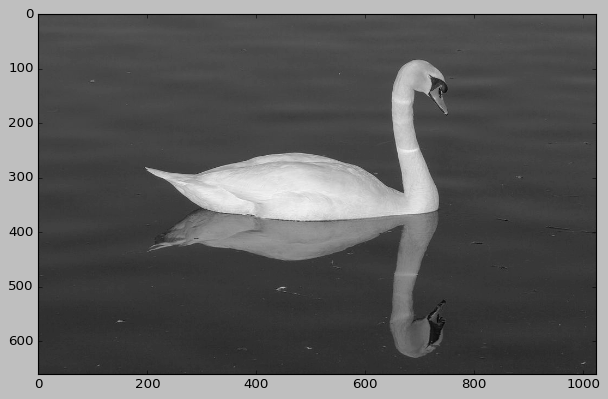

<PIL.Image.Image image mode=LA size=1024x660 at 0x2664EC453C0>


In [63]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [64]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [65]:
U.shape

(660, 660)

In [66]:
V.shape

(1024, 1024)

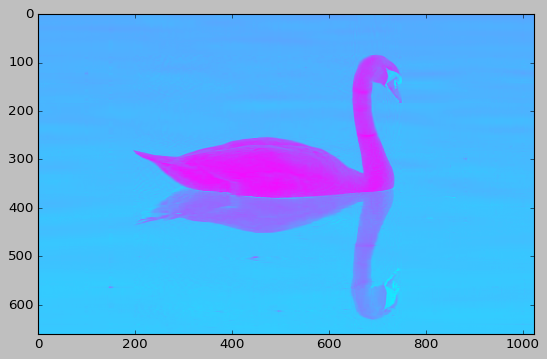

Felicidades la imagen está comprimida... y convertiste al cisne en un flamingo ;)
<PIL.Image.Image image mode=LA size=1024x660 at 0x2664EC453C0>


In [67]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='cool')
plt.show()
print("Felicidades la imagen está comprimida... y convertiste al cisne en un flamingo ;)")
print(img)

¡Ahora es tu turno!, comprime 3 imagenes

#### 2.1 - Compresión de imagen 1

[255. 255. 255. ... 255. 255. 255.]


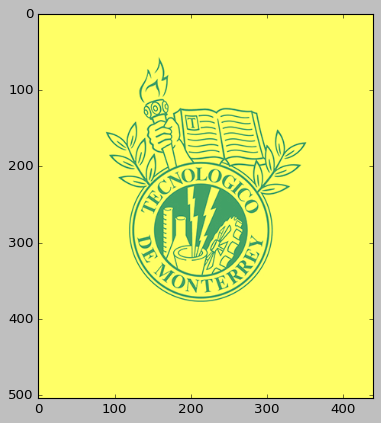

<PIL.Image.Image image mode=LA size=440x504 at 0x2664CE33E50>


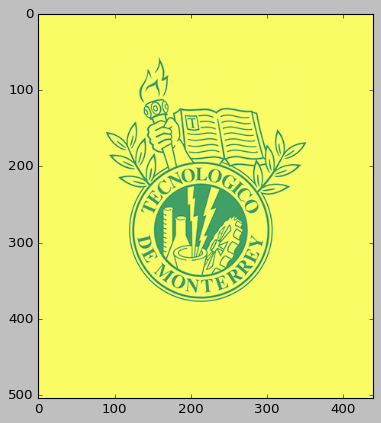

In [68]:
#imagen 1

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://brandemia.org/sites/default/files/sites/default/files/tec_logo_antes.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)


imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='summer')
plt.show()
print(img1)

# ------------------------------------------------
U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape
nvalue1 = 220
reconstimg1 = np.matrix(U1[:,:nvalue1])*np.diag(D1[:nvalue1])*np.matrix(V1[:nvalue1,:])
plt.imshow(reconstimg1,cmap='summer')
plt.show()

#### 2.2 - Compresión de imagen 2

[162. 162. 166. ... 232. 232. 232.]


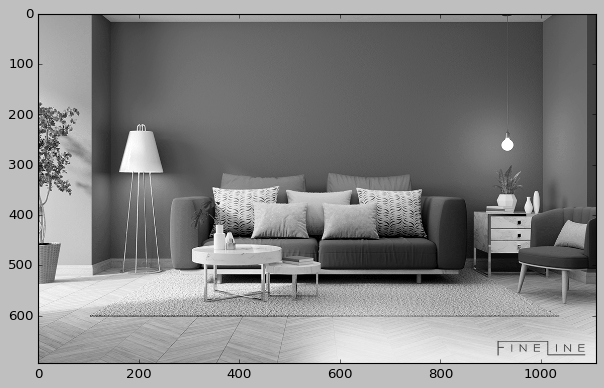

<PIL.PngImagePlugin.PngImageFile image mode=P size=1110x694 at 0x2664D813040>


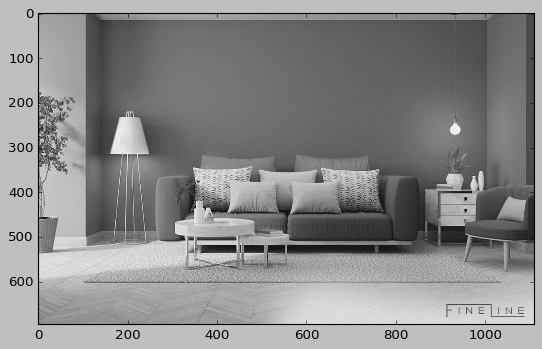

In [69]:
#imagen 2

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://fineline.com.sg/wp-content/uploads/2022/05/interior-design-in-singapore.png'))
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)


imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

# ------------------------------------------------
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape
nvalue2 = 180
reconstimg2 = np.matrix(U2[:,:nvalue2])*np.diag(D2[:nvalue2])*np.matrix(V2[:nvalue2,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()

#### 2.3 - Compresión de imagen 3

[ 52.  47.  46. ... 142. 144. 146.]


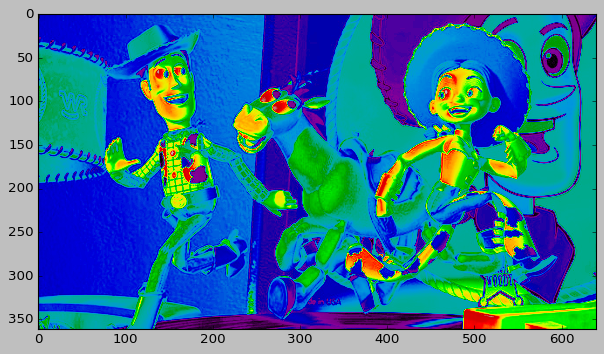

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x361 at 0x2664CE68E50>


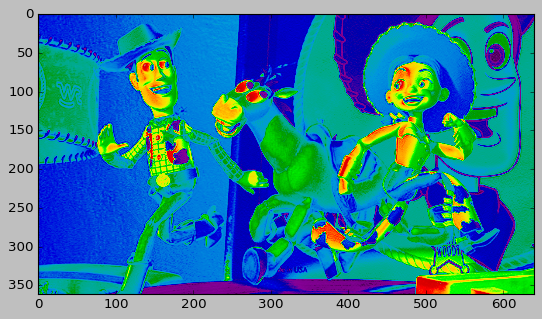

In [70]:
#imagen 3

plt.style.use('classic')
#img3 = Image.open(urllib.request.urlopen('https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEit66857mUczy4xldzyoWNHTVCDCn65PHyS_Y-DkAtdMQ3jnYOwz7kErK-OF70CrQldeWJk7NJLTzpTa9oZOVpLqA5VjCJHOlDUNB_lBL_urZnRjQaz-CrUz4KZDIhipH62BZvOLRGy7J-7FSDAUxN9d3hm8HdRzIqYvaD8u-M5ukKbsWtsq7GG-jRWHA/s1920/TVLaint_Columna_Looney_Tunes_Nuevo_Redoblaje.jpg'))
img3 = Image.open(urllib.request.urlopen('https://lumiere-a.akamaihd.net/v1/images/h_toystory2_mobile_19639_649ba64a.jpeg?region=0,10,640,361'))
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)


imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3, cmap='nipy_spectral')
plt.show()
print(img3)

# ------------------------------------------------
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape
nvalue3 = 200
reconstimg3 = np.matrix(U3[:,:nvalue3])*np.diag(D3[:nvalue3])*np.matrix(V3[:nvalue3,:])
plt.imshow(reconstimg3, cmap='nipy_spectral')
plt.show()

##### **Comentarios sobre Singular Value Decomposition**

Singular Value Decomposition es un algoritmo de compresión de imágenes que permite reducir la cantidad de información de una imagen sin perder la calidad de la imagen. SVD, al igual que PCA, es un algoritmo de reducción de dimensionalidad que permite reducir la cantidad de información de una matriz, mientras se conserva la mayor cantidad de información posible. En este caso, aplicado a una imagen, SVD permite reducir la cantidad de información de una imagen sin perder la calidad de la imagen, esto es conocido como un algoritmo de compresión de imágenes. La utilizad de SVD para la compresión de imágenes es muy importante para la transmisión de imágenes a través de internet.

En el ejemplo del cisne Lucy, se puede observar que la imagen original tiene 660x1024=680640 pixeles, pero después de aplicar SVD, la imagen tiene 660x50=33000 pixeles, es decir, se redujo la cantidad de información de la imagen en un 95%. En el ejemplo de reconstimg1 (imagen con el logotipo del Tec de Monterrey), la imagen original tiene 440x504=221760 pixeles, pero después de aplicar SVD, la imagen tiene 440x220=96800 pixeles, es decir, se redujo la cantidad de información de la imagen en un 56%. Podemos hacer varios intentos para encontrar un punto de equilibrio entre la cantidad de información que se desea conservar y la cantidad de información que se desea reducir. En el ejemplo del logotipo del Tec de Monterrey, si colocamos el nvalue1 en 44 (al 20% del tamaño original), el logotipo se ve casi igual que la imagen original, pero la cantidad de información se redujo en un 80%; sin embargo, el color map aplicado se distorsiona, y aún se visualiza cierto ruido alrededor del logotipo. Si colocamos el nvalue1 en 220, la reducción de información es del 56%, pero el logotipo se ve casi igual que la imagen original, y el color map se conserva.

En el ejemplo de la imagen de la sala, se puede observar que al aumentar el valor de nvalue2, la imagen se vuelve más nítida y el contraste de las sombras aumenta, pero se sacrifica la compresión del tamaño. Por otro lado, si se reduce el valor de nvalue2, la imagen pierde cierta profundidad y contraste en los negros o sombras, pero la imagen se sigue viendo muy parecida a la original, por lo que se puede decir que la imagen se comprime bastante bien, considerando que su tamaño original es de 1110x694, y el tamaño de la imagen comprimida es de 1110x180, lo cual representa una reducción de 74.2% en el tamaño de la imagen.

Por último, la imagen de Toy Story, que es la que más se ve afectada por la compresión, ya que es una imagen con muchos colores y con muchos detalles, por lo que se pierden muchos datos al comprimir la imagen. Lo podemos observar especialmente en los ojos de los personajes; para no perder detalle alrededor de los ojos de los personajes, el nvalue3 debe ser mayor a 200, y la reducción de la imagen se ve más afectada. Sin embargo, si podemos sacrificar el detalle de los ojos de los personajes, podemos reducir el nvalue3 a 100 y la compresión de la imagen se ve menos afectada.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [71]:
#tu codigo aqui

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

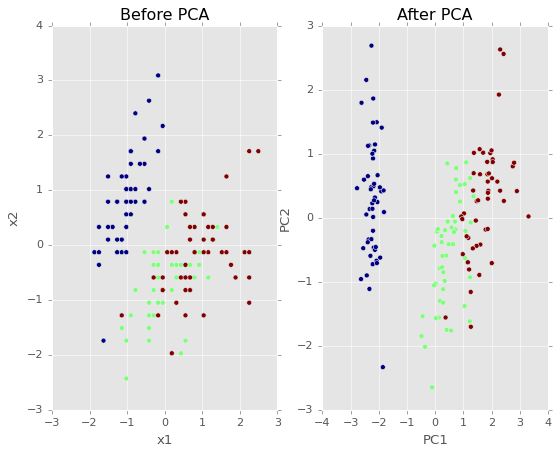

In [72]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [73]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [74]:
np.cov(X_new.T)
# array([[2.93808505e+00, 4.83198016e-16],
#       [4.83198016e-16, 9.20164904e-01]])

array([[ 2.93808505e+00, -1.90749728e-16],
       [-1.90749728e-16,  9.20164904e-01]])

In [75]:
pca.explained_variance_
# array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [76]:
print(abs( pca.components_ ))
# [[0.52106591 0.26934744 0.5804131 0.56485654]
# [0.37741762 0.92329566 0.02449161 0.06694199]]

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [77]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
  
    plt.tick_params(axis='both', which='both', labelsize=14)

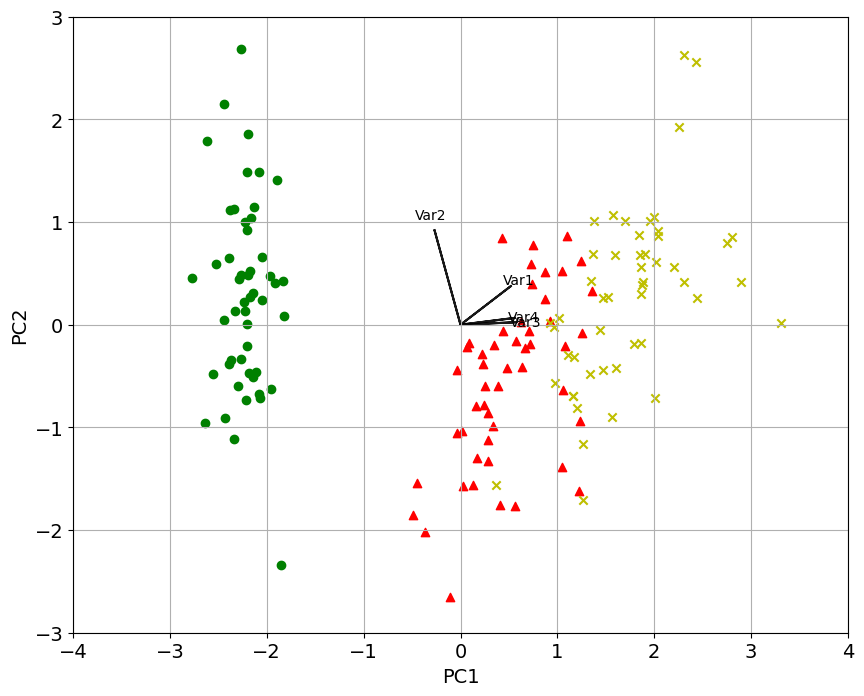

In [78]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [79]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

#### **Describe lo relevante del ejercicio y que descubriste de las variables análizadas.** 

##### Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.
En el comparativo de los dos scatter plots se observa de forma muy clara la diferencia que logra el Principal Component Analysis. Después del PCA se observa el acomodo lineal de los datos; esto se vuelve aún más evidente en el último gráfico, donde ya aparecen representados los vectores, y la dirección de los mismos nos da a entender como cada variable proporciona mayor información al PC1 o al PC2.

##### ¿Qué es feature importance y para que nos sirve?
El proceso de feature importances es un proceso de selección de características que se utiliza para seleccionar las características más importantes de un conjunto de datos. El proceso de selección de características se utiliza para reducir la dimensionalidad del conjunto de datos, reduciendo el número de características de entrada y, por lo tanto, simplificando el modelo para hacerlo más fácil de entender. El proceso de selección de características es muy importante debido a que nos permite reducir la cantidad de características de entrada, lo que hace que el modelo sea más fácil de entender y más fácil de implementar. El proceso de selección de características también nos permite reducir el tiempo de entrenamiento del modelo, lo que hace que el modelo sea más rápido y más fácil de implementar.


##### ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
Uno de los hallazgos más importantes en el ejercicio de feature importance fue que con tan solo dos componentes principales, podemos obtener una gran variabilidad de los datos, simplificando en gran manera el análisis de datos y por lo tanto, el desempeño de un potencial modelo.


##### ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
El análisis de PCA es especialmente útil en el análisis de datos donde existe gran cantidad de variables, sobre todo si estas están altamente correlacionadas. Esto lo podemos observar por ejemplo en el sector financiero, en donde se manejan grandes cantidades de datos y se requiere de un análisis de datos que sea rápido y preciso para otorgar un crédito a un cliente, y donde las variables están altamente relacionadas entre sí.

---